# **MACHINE LEARNING PROJECT FOR HEART DISEASE BY `MOHAMED FALILOU FALL`, `KHARDIATA KE FAYE` AND `MAMADOU SALIF DIALLO`**

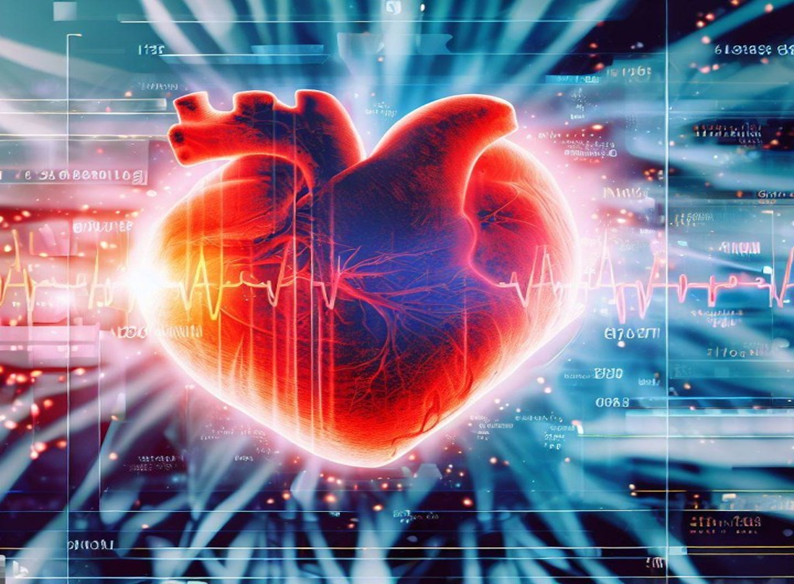

*ENONCE DU PROBLEME :*
Mise en place de modèle de types classification   permettant de  prédire la variable cible **malade(TARGET)**  en fonction de l'ensemble de variable d'entrées.

*LES DONNEES :* 
Cet ensemble de données donne les informations relatives aux maladies cardiaques. Le jeu de données contient 14 colonnes, la cible est la variable de classe qui est affectée par les 13 autres colonnes. L'objectif est de classer la variable cible en (malade - non malade) à l'aide de différents algorithmes d'apprentissage automatique et de déterminer quel algorithme convient à ce jeu de données.

*LES VARIABLES :*

        VAR1= Âge (âge en années)
        VAR2 = Sexe (1 = homme ; 0 = femme)
        VAR3 = CP (type de douleur thoracique)
        VAR4 = TRESTBPS (pression artérielle au repos (en mm Hg à l'admission à l'hôpital))
        VAR5 = CHOL (cholestérol sérique en mg/dl)
        VAR6 = FPS (glycémie à jeun > 120 mg/dl) (1 = vrai ; 0 = faux)
        VAR7 = RESTECH (résultats électrocardiographiques au repos)
        VAR8 = THALACH (fréquence cardiaque maximale atteinte)
        VAR9 = EXANG (angine de poitrine induite par l'exercice (1 = oui ; 0 = non))
        VAR10 = OLDPEAK (dépression ST induite par l'exercice par rapport au repos)
        VAR11 = SLOPE (la pente du segment ST de pointe à l'effort)
        VAR12 = CA (nombre de vaisseaux principaux (0-3) colorés par flourosopie)
        VAR13 = THAL (3 = normal ; 6 = défaut fixe ; 7 = défaut réversible)
        VAR14 = TARGET (1 ou 0)



# A - PHASE DE POSER LE PROBLEME (MISE EN EQUATION)

## A-1- Importation des donnees `heart.csv`

### A-1-1 Importation des bibliotheques requis 

In [84]:


# Pandas
import pandas as pd

# Numpy
import numpy as np

# Train_test_split
from sklearn.model_selection import train_test_split

# Sous-echantillonnage.
from imblearn.under_sampling import RandomUnderSampler

# Sur-echantillonnage.
from imblearn.over_sampling import RandomOverSampler

# IStandardisation des données.
from sklearn.preprocessing import StandardScaler

# Regression logistique.
from sklearn.linear_model import LogisticRegression
# Arbe de decision.
from sklearn.tree import DecisionTreeClassifier
# Random forest.
from sklearn.ensemble import RandomForestClassifier

# Graphes
import matplotlib.pyplot as plt
import seaborn as sns

# Taux reponses.
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

# Matrices mixtes.
from sklearn.metrics import confusion_matrix

# ROCs.
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Code des Labels
from sklearn.preprocessing import LabelEncoder

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from collections import Counter


### A-1-2 Importation des donnees  

In [85]:
data = pd.read_csv('heart.csv')

## A-2 Lecture des donnees 

In [86]:
data.head(37)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [87]:
# informations sur la base de donnees 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## A-3 Listing des differents modeles pour resoudre le probleme

- La regression logistique
- K Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Arbres de Decision (Decision Trees)
- Random Forest
- Gradient Boosting Machines (GBM)
- XGBoost
- LightGBM
- Reseaux de Neurones Artificiels (ANN)


# B - PHASE DE LA PREPARATION DES DONNEES 

## B-1 Verification et traitement des valeurs manquantes et doublons

In [88]:
# Verification des valeurs manquantes 
valeurs_manquantes = data.isnull().sum()
print("valeurs manquantes par colonne :")
print(valeurs_manquantes)

valeurs manquantes par colonne :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [89]:
# Verification des doublons
nombre_de_doublons = data.duplicated().sum()
print("Nombre de doublons present :")
print(nombre_de_doublons)

Nombre de doublons present :
1


In [90]:
# Suppression des doublons 
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


## B-2 Verification et traitement des valeurs abberantes

### B-2-1 Detection visuelle des valeurs abberrentes par la methode des Boxplots

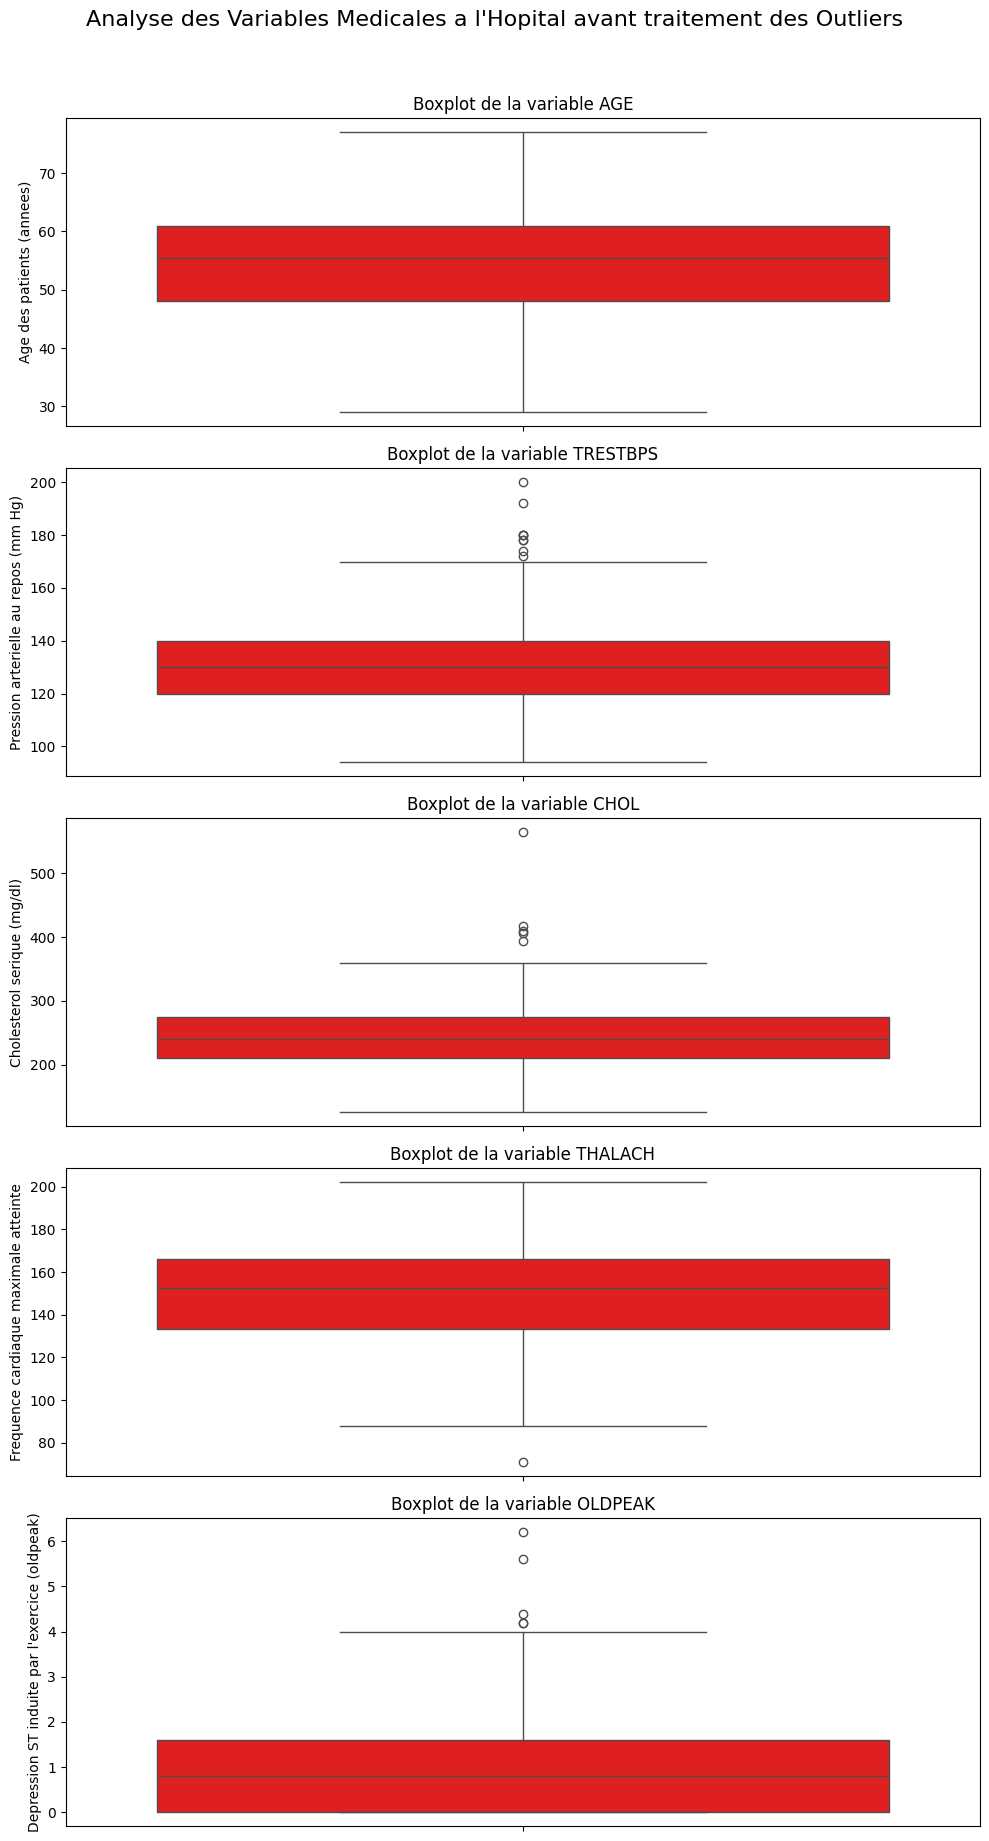

In [91]:
# Nombre de variables de type numerique
variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Descriptions pour chaque axe Y
y_labels = {
    'age': 'Age des patients (annees)',
    'trestbps': 'Pression arterielle au repos (mm Hg)',
    'chol': 'Cholesterol serique (mg/dl)',
    'thalach': 'Frequence cardiaque maximale atteinte',
    'oldpeak': 'Depression ST induite par l\'exercice (oldpeak)'
}

# Creation de la figure et des sous-graphiques (6 lignes, 1 colonne)
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 18))

# Couleur rouge sang
boxplot_color = "red"

# Creation des boxplots pour chaque variable avec leurs descriptions Y
for i, var in enumerate(variables):
    sns.boxplot(data=data[var], ax=axs[i], color=boxplot_color)
    axs[i].set_title(f'Boxplot de la variable {var.upper()}')
    axs[i].set_ylabel(y_labels[var])  
    
    
    
# Ajout d'un titre
fig.suptitle("Analyse des Variables Medicales a l'Hopital avant traitement des Outliers", fontsize=16, y=1.02)


plt.tight_layout()
plt.show()


### B-2-2 Traitement des valeurs abberantes par la methode de l'IQR (Interquartile Range)

In [92]:


# Liste des variables 
variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Boucle pour chaque variable
for var in variables:
    Q1 = data[var].quantile(0.25)  # Premier quartile
    Q3 = data[var].quantile(0.75)  # Troisieme quartile
    IQR = Q3 - Q1  # Calcul de l'IQR

    # Limites inferieure et superieure basees sur l'IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrage des outliers
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]




### B-2-3 Nouvelle visualisation des Boxplots apres traitement des valeurs manquantes

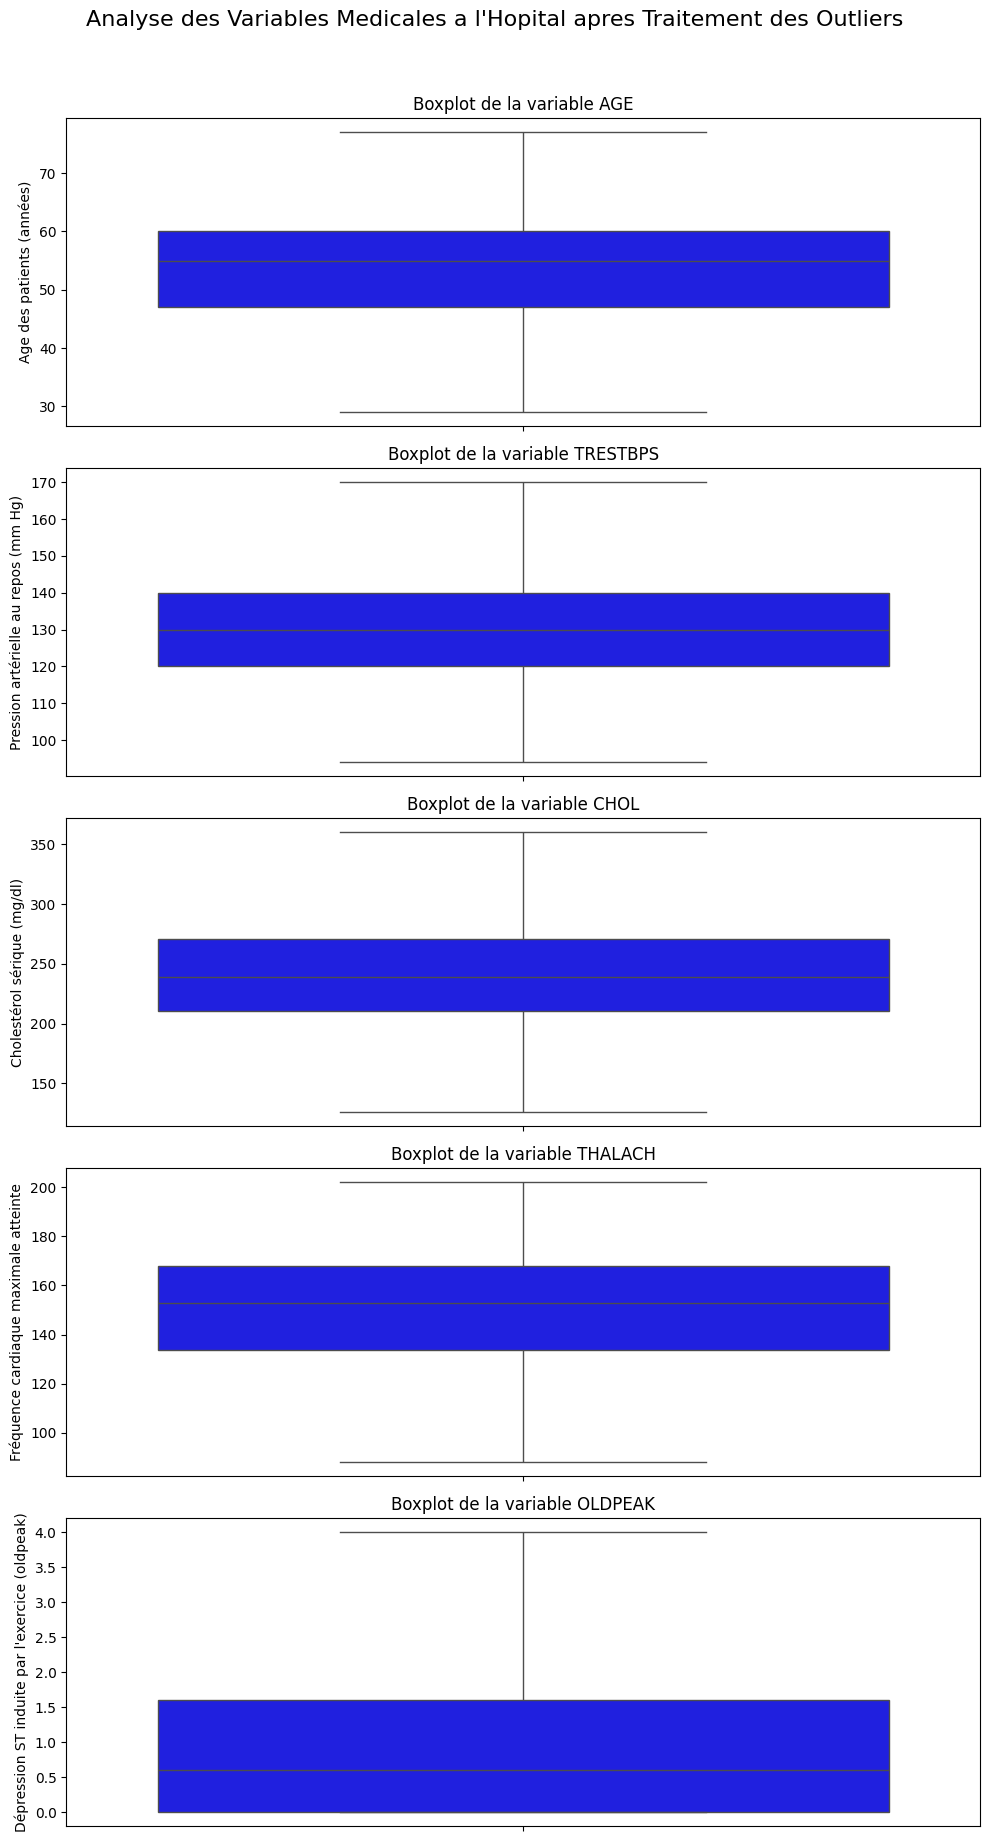

In [93]:

variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


y_labels = {
    'age': 'Age des patients (années)',
    'trestbps': 'Pression artérielle au repos (mm Hg)',
    'chol': 'Cholestérol sérique (mg/dl)',
    'thalach': 'Fréquence cardiaque maximale atteinte',
    'oldpeak': 'Dépression ST induite par l\'exercice (oldpeak)'
}


fig, axs = plt.subplots(len(variables), 1, figsize=(10, 18))


boxplot_color = "blue"


for i, var1 in enumerate(variables):
    sns.boxplot(data=data[var1], ax=axs[i], color=boxplot_color)
    axs[i].set_title(f'Boxplot de la variable {var1.upper()}')
    axs[i].set_ylabel(y_labels[var1])


fig.suptitle("Analyse des Variables Medicales a l'Hopital apres Traitement des Outliers", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


### B-2-4 Heatmap de correlation des variables numeriques continues 

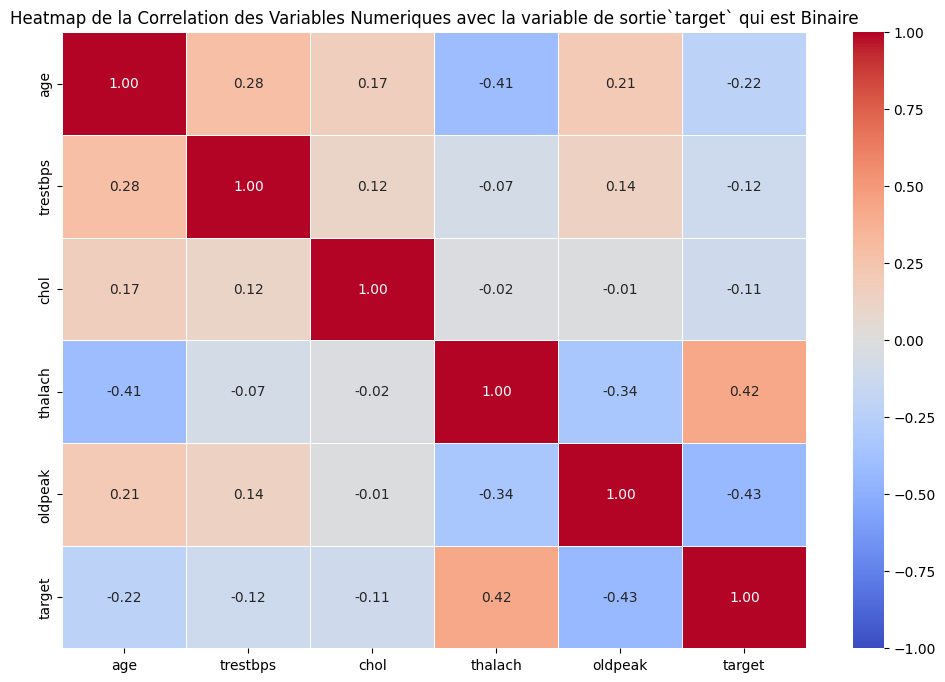

In [94]:

variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


df_numeric = data[variables + ['target']]


correlation_matrix = df_numeric.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap de la Correlation des Variables Numeriques avec la variable de sortie`target` qui est Binaire')
plt.show()


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
 13  target    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# C - PHASE DE LA DIVISION DES DONNEES 

## C-1 Division du jeux de donnees en 2 parties (30% test, 70% entrainement)

In [96]:
# Division des bases de donnees de la variable cible des variables predicteurs 
x = data.drop("target", axis=1)
y = data['target']

In [97]:
# Informations sur la Base de donnees des variables predicateurs 
x.info()


<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 31.0 KB


In [98]:
# Informations sur la base de donnees de la variable a predire 
y.info()

<class 'pandas.core.series.Series'>
Index: 283 entries, 0 to 302
Series name: target
Non-Null Count  Dtype
--------------  -----
283 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [99]:
# Division de la base de donnees a un ensemble d'entrainement et un ensemble test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (198, 13)
y_train size: (198,)

x_test size: (85, 13)
y_test size: (85,)


## C-2 L'interet de diviser le jeux de donnees en 2 partie (30% test, 70% entrainement)

L'interet principal de divisier la base de donnees en un enseble d'entrainement et un ensemble test est d'eviter le surapprentissage ou l'Overfiting

# D - PHASE DE LA CREATION, ENTRAINEMENT ET EVALUATION DES MODELES 

## D-1 Creation, entrainement et evaluation des modeles

### D-1-1 Modele de Regression Logistique

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Creation du modele de regression logistique
model_logist = LogisticRegression(max_iter=1000)  

# Entrainement du modele de regression logistique
model_logist.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model_logist.predict(x_test)

# Evaluation du modele
accuracy_logist = accuracy_score(y_test, y_pred)
report_logist = classification_report(y_test, y_pred)

print(f"Accuracy du modele de regression logistique : {accuracy_logist:.2f}")
print("Rapport de classification :")
print(report_logist)


Accuracy du modele de regression logistique : 0.81
Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        37
           1       0.81      0.88      0.84        48

    accuracy                           0.81        85
   macro avg       0.81      0.80      0.81        85
weighted avg       0.81      0.81      0.81        85



### D-1-2 Modele du K Nearest Neighbors (KNN)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

k = 13  
model_knn = KNeighborsClassifier(n_neighbors=k)

# Entrainement du modele KNN
model_knn.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model_knn.predict(x_test)

# Evaluation du modele
accuracy_knn = accuracy_score(y_test, y_pred)
report_knn = classification_report(y_test, y_pred)

print(f"Accuracy du modèle KNN : {accuracy_knn:.2f}")
print("Rapport de classification :")
print(report_knn)


Accuracy du modèle KNN : 0.53
Rapport de classification :
              precision    recall  f1-score   support

           0       0.47      0.57      0.51        37
           1       0.60      0.50      0.55        48

    accuracy                           0.53        85
   macro avg       0.53      0.53      0.53        85
weighted avg       0.54      0.53      0.53        85



### D-1-3 Modele de Support Vector Machine (SVM)

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Creation du modele SVM
model_svm = SVC(kernel='linear')  

# Entraînement du modele SVM
model_svm.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model_svm.predict(x_test)

# Evaluation du modele
accuracy_svm = accuracy_score(y_test, y_pred)
report_svm = classification_report(y_test, y_pred)

print(f"Accuracy du modele SVM : {accuracy_svm:.2f}")
print("Rapport de classification :")
print(report_svm)


Accuracy du modele SVM : 0.81
Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        37
           1       0.80      0.90      0.84        48

    accuracy                           0.81        85
   macro avg       0.82      0.80      0.80        85
weighted avg       0.81      0.81      0.81        85



### D-1-4 Modele des Arbres de Decision (Decision Trees Classifier)

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creation du modele d'arbre de decision
model_tree = DecisionTreeClassifier()

# Entrainement du modele d'arbre de decision
model_tree.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred_tree = model_tree.predict(x_test)

# Evaluation du modele
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f"Accuracy du modele d'arbre de decision : {accuracy_tree:.2f}")
print("Rapport de classification :")
print(report_tree)


Accuracy du modele d'arbre de decision : 0.71
Rapport de classification :
              precision    recall  f1-score   support

           0       0.64      0.76      0.69        37
           1       0.78      0.67      0.72        48

    accuracy                           0.71        85
   macro avg       0.71      0.71      0.71        85
weighted avg       0.72      0.71      0.71        85



### D-1-5 Modele de Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creation du modele Random Forest
n_estimators = 100  
model_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

# Entrainement du modele Random Forest
model_rf.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model_rf.predict(x_test)

# Evaluation du modele
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(f"Accuracy du modele Random Forest : {accuracy_rf:.2f}")
print("Rapport de classification :")
print(report_rf)


Accuracy du modele Random Forest : 0.80
Rapport de classification :
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        37
           1       0.82      0.83      0.82        48

    accuracy                           0.80        85
   macro avg       0.80      0.80      0.80        85
weighted avg       0.80      0.80      0.80        85



### D-1-6 Modele de Gradient Boosting Machines (GBM)

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creation du modele GBM
model_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Entrainement du modele GBM
model_gbm.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model_gbm.predict(x_test)

# Evaluation du modele
accuracy_gbm = accuracy_score(y_test, y_pred)
report_gbm = classification_report(y_test, y_pred)

print(f"Accuracy du modele GBM : {accuracy_gbm:.2f}")
print("Rapport de classification :")
print(report_gbm)


Accuracy du modele GBM : 0.80
Rapport de classification :
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        37
           1       0.84      0.79      0.82        48

    accuracy                           0.80        85
   macro avg       0.80      0.80      0.80        85
weighted avg       0.80      0.80      0.80        85



### D-1-7 Modele de XGBoost

In [106]:
#pip install xgboost

In [107]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Creation du modele XGBoost
model_xgb = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='mlogloss'
)

# Entrainement du modele XGBoost
model_xgb.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model_xgb.predict(x_test)

# Evaluation du modele
accuracy_xgb = accuracy_score(y_test, y_pred)
report_xgb = classification_report(y_test, y_pred)

print(f"Accuracy du modele XGBoost : {accuracy_xgb:.2f}")
print("Rapport de classification :")
print(report_xgb)


Accuracy du modele XGBoost : 0.74
Rapport de classification :
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        37
           1       0.80      0.73      0.76        48

    accuracy                           0.74        85
   macro avg       0.74      0.74      0.74        85
weighted avg       0.75      0.74      0.74        85



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:03:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### D-1-8 Modele de LightGBM

In [108]:
#pip install lightgbm

In [109]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Creation du modele LightGBM
model_lgb = lgb.LGBMClassifier()

# Entrainement du modele LightGBM
model_lgb.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model_lgb.predict(x_test)

# Evaluation du modele
accuracy_lgb = accuracy_score(y_test, y_pred)
report_lgb = classification_report(y_test, y_pred)

print(f"Accuracy du modele LightGBM : {accuracy_lgb:.2f}")
print("Rapport de classification :")
print(report_lgb)


[LightGBM] [Info] Number of positive: 110, number of negative: 88
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 198, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555556 -> initscore=0.223144
[LightGBM] [Info] Start training from score 0.223144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

### D-1-9 Modele de Reseaux de Neurones Artificiels (ANN)

In [110]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creation du modele ANN
model_ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=1)

# Entrainement du modele ANN
model_ann.fit(x_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model_ann.predict(x_test)

# Evaluation du modele
accuracy_ann = accuracy_score(y_test, y_pred)
report_ann = classification_report(y_test, y_pred)

print(f"Accuracy du modele ANN : {accuracy_ann:.2f}")
print("Rapport de classification :")
print(report_ann)


Accuracy du modele ANN : 0.79
Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        37
           1       0.78      0.88      0.82        48

    accuracy                           0.79        85
   macro avg       0.79      0.78      0.78        85
weighted avg       0.79      0.79      0.79        85



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## D-2 Selection du meilleur model ()

Le meilleur modele est : Gradient Boosting avec un score moyen de 0.79


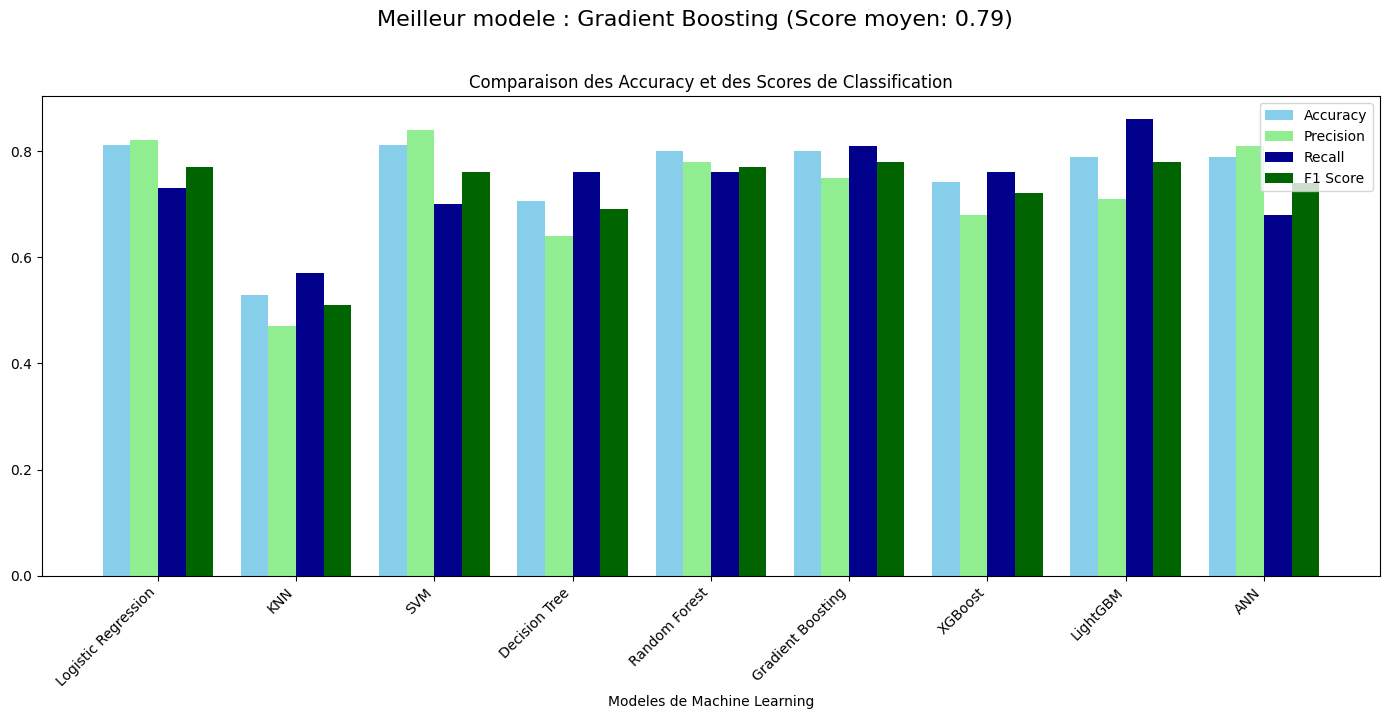

In [111]:

model_names = [
    'Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest',
    'Gradient Boosting', 'XGBoost', 'LightGBM', 'ANN'
]


accuracies = [
    accuracy_logist, accuracy_knn, accuracy_svm, accuracy_tree,
    accuracy_rf, accuracy_gbm, accuracy_xgb, accuracy_lgb, accuracy_ann
]

reports = [report_logist, report_knn, report_svm, report_tree,
    report_rf, report_gbm, report_xgb, report_lgb, report_ann]

# Extraction des valeurs de precision, rappel, et score F1
precision_scores = []
recall_scores = []
f1_scores = []

for report in reports:
    lines = report.split('\n')
    precision_scores.append(float(lines[2].split()[1]))  
    recall_scores.append(float(lines[2].split()[2]))     
    f1_scores.append(float(lines[2].split()[3]))         

# Calcul de la moyenne des metriques pour chaque modele
mean_scores = []
for i in range(len(model_names)):
    mean_score = np.mean([accuracies[i], precision_scores[i], recall_scores[i], f1_scores[i]])
    mean_scores.append(mean_score)

# Selection du meilleur modele
best_model_index = np.argmax(mean_scores)
best_model_name = model_names[best_model_index]
best_model_score = mean_scores[best_model_index]

print(f"Le meilleur modele est : {best_model_name} avec un score moyen de {best_model_score:.2f}")

# Trace des graphiques
x = np.arange(len(model_names))  
width = 0.2  

fig, ax = plt.subplots(figsize=(14, 7))

# Barres pour les accuracies
rects1 = ax.bar(x - width*1.5, accuracies, width, label='Accuracy', color='skyblue')

# Barres pour les scores de precision
rects2 = ax.bar(x - width/2, precision_scores, width, label='Precision', color='lightgreen')

# Barres pour les scores de rappel
rects3 = ax.bar(x + width/2, recall_scores, width, label='Recall', color='darkblue')

# Barres pour les scores F1
rects4 = ax.bar(x + width*1.5, f1_scores, width, label='F1 Score', color='darkgreen')

# Ajout des labels et du titre
ax.set_xlabel('Modeles de Machine Learning')
ax.set_title('Comparaison des Accuracy et des Scores de Classification')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Affichage du meilleur modele sur le graphique
best_model_label = f"Meilleur modele : {best_model_name} (Score moyen: {best_model_score:.2f})"
plt.suptitle(best_model_label, fontsize=16, y=1.02)

# Affichage du graphique
plt.tight_layout()
plt.show()


# E - PHASE DE SAUVEGARDE ET DEPLOIMENT DU MODEL (Decision Tree)

## E-1 Sauvegarde du model (Decision Tree)

In [112]:
# Importation de Pickle 
import pickle

In [113]:
# Sauvegarde du modele avec Pickle 
with open('model_tree.pkl', 'wb') as file:
    pickle.dump(model_tree, file)

## E-2 Deploiment du model (Decison Tree)

Link de l'Application : 

# F - AMELIORATIONS FUTURES DU PROJET

Le système enregistre automatiquement la date et l'heure de chaque consultation ainsi que toutes les données du patient dans une base de données sécurisée. Ces informations sont utilisées pour optimiser les performances du système et mener des analyses approfondies sur les maladies cardiaques au Sénégal. Cela contribue à améliorer la prise en charge des patients et à enrichir la recherche médicale.
Dans sa version améliorée, l'application sera déployée sur des montres connectées (Apple Watch, Google Watch, etc.), permettant l'enregistrement des données via les capteurs des montres pour certaines des 13 variables étudiées. Le système inclura également une évaluation des risques, y compris le risque d'arrêt cardiaque, le risque de décès, ainsi que la date probable de décès en cas de diagnostic positif.
Grâce aux données sanitaires collectées à travers les montres connectées, l'institut sanitaire (clinique cardiologique) pourra suivre en temps réel les patients à risque et déployer un système de gestion des interventions rapides.
Liste des parties prenantes concernées du projet :
1. Human Centred Designer – Data Scientist - Directeur du Projet : Conçoit l'interface utilisateur en tenant compte des besoins des utilisateurs, optimise l'analyse des données pour offrir des insights pertinents et pilote le projet.
2. Patients : Utilisent les montres connectées pour fournir des données vitales. Leur retour est crucial pour ajuster l'application aux besoins réels.
3. Médecins et Personnel Médical : Utilisent les données pour diagnostiquer et traiter les patients. Ils fournissent également des retours sur l'efficacité de l'application et des suggestions pour son amélioration.
4. Institut Sanitaire / Clinique Cardiologique : Implémente l'application et supervise le suivi des patients à risque. Assure également la gestion des interventions rapides en fonction des alertes générées par le système.
5. Développeurs de l'Application : Conçoivent et maintiennent l'application, assurant son bon fonctionnement et l'intégration des nouvelles fonctionnalités, comme l'enregistrement des données via les montres connectées.
6. Fournisseurs de Montres Connectées : Fournissent les dispositifs nécessaires à la collecte des données. Assurent également le support technique pour l'intégration des montres avec l'application.
7. Autorités Sanitaires Régionales et Nationales : Supervisent la conformité réglementaire et l'impact du projet sur la santé publique. Participent à la validation et à la réglementation de l'application.
8. Chercheurs en Médecine et en Santé Publique : Utilisent les données collectées pour mener des études et recherches sur les maladies cardiaques et leur gestion au Sénégal.
9. Équipe de Sécurité des Données : Assure la protection des données des patients et veille à ce que le système respecte les normes de sécurité et de confidentialité.
10. Partenaires Technologiques : Fournissent des technologies complémentaires et des expertises techniques pour le développement et l'amélioration continue de l'application.
11. Utilisateurs de l'Application : Comprennent à la fois les patients et les médecins qui interagissent avec le système au quotidien. Leur expérience utilisateur est essentielle pour l'amélioration continue de l'application.
12. Responsables de la Conformité Réglementaire : Veillent à ce que le projet respecte toutes les exigences légales et éthiques en matière de santé et de protection des données.

In [114]:
consult = pd.read_csv('consultations.csv')

In [115]:
consult

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,30,Homme,1,120,200,Oui,0,150,Oui.1,1.0,1.1,0.1,1.2,Maladie cardiaque,2024-09-07 13:21:53
0,'klmlk,'lklkkl,lm;lmlm,m l l,30,Homme,1,120,200,Oui,0,150,Oui,1.0,1,0,1,Maladie cardiaque,2024-09-07 13:22:21
1,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:26:24
2,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:28:31
3,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:29:03
4,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:56:55
5,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:57:35
6,Diouf,Maty,Dieuppeul,3098573870875,62,Femme,1,118,203,Non,1,136,Non,1.2,1,0,1,Maladie cardiaque,2024-09-11 00:00:23
7,Pouye,Fatou,Thiaroye,7644451678,78,Femme,2,150,180,Non,1,140,Non,1.2,2,1,2,Maladie cardiaque,2024-09-11 21:02:57


In [116]:
consult = consult.rename(columns={'Unnamed: 0': 'Nom'})
consult = consult.rename(columns={'Unnamed: 1': 'Prenom'})
consult = consult.rename(columns={'Unnamed: 2': 'Adresse'})
consult = consult.rename(columns={'Unnamed: 3': 'Telephone'})
consult = consult.rename(columns={'30': 'Age'})
consult = consult.rename(columns={'Homme': 'Sexe'})
consult = consult.rename(columns={'1': 'Type de douleur thoracique (CP)'})
consult = consult.rename(columns={'120': 'Pression artérielle au repos (TRESTBPS) (en mm Hg)'})
consult = consult.rename(columns={'200': 'Cholestérol sérique (CHOL) (en mg/dl)'})
consult = consult.rename(columns={'Oui': 'Glycémie à jeun > 120 mg/dl (FPS)'})
consult = consult.rename(columns={'0': 'Type de douleur thoracique (CP)'})
consult = consult.rename(columns={'150': 'Résultats électrocardiographiques au repos (RESTECH)'})
consult = consult.rename(columns={'Oui.1': 'Fréquence cardiaque maximale atteinte (THALACH)'})


consult = consult.rename(columns={'1.0': 'Angine induite par l\'exercice (EXANG)'})

consult = consult.rename(columns={'1.1': 'Dépression ST induite par l\'exercice (OLDPEAK)'})

consult = consult.rename(columns={'0.1': 'Pente du segment ST (SLOPE)'})

consult = consult.rename(columns={'1.2': 'Nombre de vaisseaux principaux colorés par flouroscopie (CA)'})

consult = consult.rename(columns={'Maladie cardiaque': 'Diagnostique(Resultat)'})

consult = consult.rename(columns={'2024-09-07 13:21:53': 'Date Consultation'})


consult

,Nom,Prenom,Adresse,Telephone,Age,Sexe,Type de douleur thoracique (CP),Pression artérielle au repos (TRESTBPS) (en mm Hg),Cholestérol sérique (CHOL) (en mg/dl),Glycémie à jeun > 120 mg/dl (FPS),Type de douleur thoracique (CP),Résultats électrocardiographiques au repos (RESTECH),Fréquence cardiaque maximale atteinte (THALACH),Angine induite par l'exercice (EXANG),Dépression ST induite par l'exercice (OLDPEAK),Pente du segment ST (SLOPE),Nombre de vaisseaux principaux colorés par flouroscopie (CA),Diagnostique(Resultat),Date Consultation
0,'klmlk,'lklkkl,lm;lmlm,m l l,30,Homme,1,120,200,Oui,0,150,Oui,1.0,1,0,1,Maladie cardiaque,2024-09-07 13:22:21
1,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:26:24
2,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:28:31
3,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:29:03
4,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:56:55
5,Diop,Pathe,lklkkljkljn,989887676,28,Homme,1,118,203,Oui,1,153,Non,1.5,2,0,1,Maladie cardiaque,2024-09-10 23:57:35
6,Diouf,Maty,Dieuppeul,3098573870875,62,Femme,1,118,203,Non,1,136,Non,1.2,1,0,1,Maladie cardiaque,2024-09-11 00:00:23
7,Pouye,Fatou,Thiaroye,7644451678,78,Femme,2,150,180,Non,1,140,Non,1.2,2,1,2,Maladie cardiaque,2024-09-11 21:02:57
